## Results after RHS bug fix 

This notebook contains the results after fixing a bug in the RHS function of `pygbe`. 

#### Bug description

In the file `matrixfree.py` the functions `generateRHS` and `generateRHS_gpu` were missing the cross-terms contributions when having two or more surfaces (see Paper equation 17). This bug affects only the results of figures 9, 10, 11. After fixing the bug we re-run the simulations and we present the results in this notebook. 

**IMPORTANT:**

- The conclusions remain exactly the same. 
- The wavelengths at which the peaks occur remain exactly the same
- There is a variation on the value of the extinction cross section smaller than 1% (we show them here)

In [1]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
import os

import lspr_response_helper

## Fig 10 using results after RHS fix

### x case

In [2]:
path_x_rhs = 'data/Cext_two_bsa_x_results/rhs_fix_res/'

sensor_file_x_rhs = path_x_rhs + 'BSA_sensorR8_d=infty_3820-3870ang.txt'

prot_file_2px_d1_rhs = path_x_rhs + 'BSA_sensorR8_2px_d=1_00_3820-3870ang.txt'

Cext max at d=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d=1 nm is 3954.11 and it occurs at a wavelength of 384.0


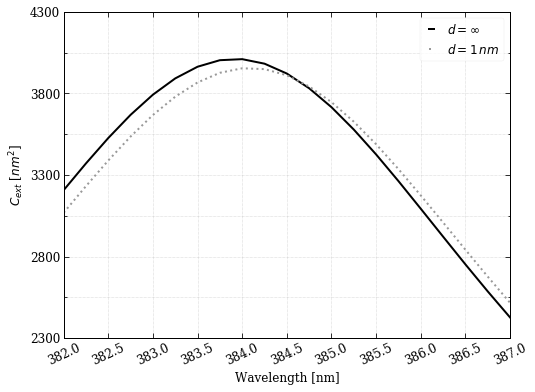

In [3]:
lspr_response_helper.report(sensor_file_x_rhs, prot_file_2px_d1_rhs)

The runs presented in the paper, had for result:

```
Cext max at d=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d=1 nm is 3979.05 and it occurs at a wavelength of 384.0
```

As you can see the wavelengths remain the same. However, for the case of $d=1$ there is a slight difference for the value of `Cext`. 

In [4]:
err_x = abs(3954.11 - 3979.05)/3979.05 *100
f'The percentage error is: {err_x:.2f}%'

'The percentage error is: 0.63%'

### y case

In [5]:
path_y_rhs = 'data/Cext_two_bsa_y_results/rhs_fix_res/'

sensor_file_y_rhs = path_y_rhs + 'BSA_sensorR8_d=infty_3820-3870ang.txt'

prot_file_2py_d1_rhs = path_y_rhs + 'BSA_sensorR8_2py_d=1_00_3820-3870ang.txt'

Cext max at d=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d=1 nm is 3958.00 and it occurs at a wavelength of 384.0


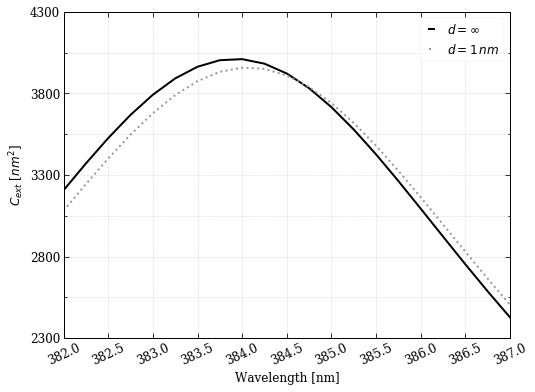

In [6]:
lspr_response_helper.report(sensor_file_y_rhs, prot_file_2py_d1_rhs)

The runs presented in the paper, had for result:

```
Cext max at d=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d=1 nm is 3985.95 and it occurs at a wavelength of 384.0
```

As you can see the wavelengths remain the same. However, for the case of $d=1$ there is a slight difference for the value of `Cext`. 

In [7]:
err_x = abs(3958.00 - 3985.95)/3985.95 *100
f'The percentage error is: {err_x:.2f}%'

'The percentage error is: 0.70%'

## Fig 11 using results after RHS fix

In [8]:
path_z_rhs = 'data/Cext_variation_with_distance_two_bsa_z_results/rhs_fix_res/'

sensor_file_z_rhs = path_z_rhs + 'BSA_sensorR8_d=infty_3820-3870ang.txt'

d2_rhs = path_z_rhs + 'BSA_sensorR8_2pz_d=2_00_3820-3870ang.txt'
d1_rhs = path_z_rhs + 'BSA_sensorR8_2pz_d=1_00_3820-3870ang.txt'
d05_rhs = path_z_rhs + 'BSA_sensorR8_2pz_d=0.5_00_3820-3870ang.txt'

bsa_files_list_rhs = [d2_rhs, d1_rhs, d05_rhs]


Cext max at d=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d=2 nm is 3963.63 and it occurs at a wavelength of 384.25
Cext max at d=1 nm is 3921.99 and it occurs at a wavelength of 384.5
Cext max at d=0.5 nm is 3883.58 and it occurs at a wavelength of 384.75


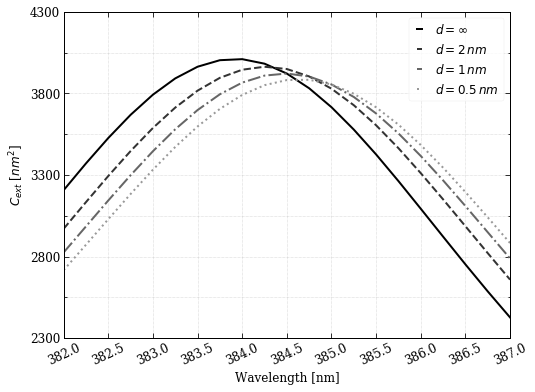

In [9]:
fig_name_response_rhs = 'results/2pz_lspr_response_RHS_fix'

lspr_response_helper.report_2pz(sensor_file_z_rhs, bsa_files_list_rhs)

## Plot comparison with paper results

This plot includes the information that is also plotted in Figure 9 of the paper. Here we will see that the difference between the plots does not affect the conclusions. 

In [10]:
def report_2pzcom(sensor_file, sensor_file_rhs, 
                  bsa_files_list, bsa_files_list_rhs, 
                  file_name=None, file_ext=None, paper=False):
    '''Reports plot of Cext vs wavelength of sensor by itself and when BSA are
       at a distance d of the sensor. For d = 2, 1 and 0.5 nm 
       It also reports the wavelength at which the maximums occur.

       bsa_files_list = list that contains paths of different distances files in
                        descending order.
    '''

    ws , Cext_s = numpy.loadtxt(sensor_file, unpack = True)

    w_d2 , Cext_d2 = numpy.loadtxt(bsa_files_list[0], unpack = True)
    w_d1 , Cext_d1 = numpy.loadtxt(bsa_files_list[1], unpack = True)
    w_d05 , Cext_d05 = numpy.loadtxt(bsa_files_list[2], unpack = True)

    ws_rhs , Cext_s_rhs = numpy.loadtxt(sensor_file_rhs, unpack = True)

    w_d2_rhs , Cext_d2_rhs = numpy.loadtxt(bsa_files_list_rhs[0], unpack = True)
    w_d1_rhs , Cext_d1_rhs = numpy.loadtxt(bsa_files_list_rhs[1], unpack = True)
    w_d05_rhs , Cext_d05_rhs = numpy.loadtxt(bsa_files_list_rhs[2], unpack = True)


    
    wavelength_2p_00 = [ws/10., w_d2/10., w_d1/10., w_d05/10., 
                       ws_rhs/10., w_d2_rhs/10., w_d1_rhs/10.,
                            w_d05_rhs/10.]
    
    cext_d1_00 = [Cext_s, Cext_d2, Cext_d1, Cext_d05, 
                  Cext_s_rhs, Cext_d2_rhs, Cext_d1_rhs, Cext_d05_rhs]
    
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    colors = ['k', '0.2', '0.4', '0.6', 'r', 'r', 'r', 'r']
    
    
    labels = ['$d = \infty$','$d=2 \,nm$', '$d=1 \,nm$', '$d=0.5 \,nm$','$d rhs = \infty$','$d rhs=2 \,nm$', '$d rhs=1 \,nm$', '$d rhs=0.5 \,nm$']
        
    lspr_response_helper.plot_cext_wave_distance(wavelength_2p_00, cext_d1_00, linestyles, colors,
                             labels, file_name, file_ext, paper=paper)
    
    
    if not paper:
        lab = ['d=infty', 'd=2 nm', 'd=1 nm', 'd=0.5 nm','d_rhs=infty', 'd_rhs=2 nm', 'd_rhs=1 nm', 'd_rhs=0.5 nm']
        lst = list(zip(cext_d1_00, lab))
        for i in range(len(lst)):
            c, l = lst[i]
            idx = numpy.where(c==max(c))
            print('Cext max at {} is {:.2f} and it occurs at a wavelength of {}'.format(l, 
                    max(c), ws[idx][0]/10))

In [11]:
#loading paper data
path_z = 'data/Cext_variation_with_distance_two_bsa_z_results/'

sensor_file_z = path_z + 'BSA_sensorR8_d=infty_3820-3870ang.txt'

d2 = path_z + 'BSA_sensorR8_2pz_d=2_00_3820-3870ang.txt'
d1 = path_z + 'BSA_sensorR8_2pz_d=1_00_3820-3870ang.txt'
d05 = path_z + 'BSA_sensorR8_2pz_d=0.5_00_3820-3870ang.txt'

bsa_files_list = [d2, d1, d05]

Cext max at d=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d=2 nm is 3942.62 and it occurs at a wavelength of 384.25
Cext max at d=1 nm is 3901.06 and it occurs at a wavelength of 384.5
Cext max at d=0.5 nm is 3863.45 and it occurs at a wavelength of 384.75
Cext max at d_rhs=infty is 4010.09 and it occurs at a wavelength of 384.0
Cext max at d_rhs=2 nm is 3963.63 and it occurs at a wavelength of 384.25
Cext max at d_rhs=1 nm is 3921.99 and it occurs at a wavelength of 384.5
Cext max at d_rhs=0.5 nm is 3883.58 and it occurs at a wavelength of 384.75


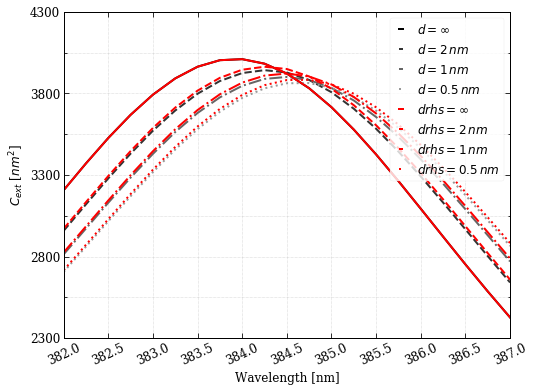

In [12]:
report_2pzcom(sensor_file_z, sensor_file_z_rhs, 
                  bsa_files_list, bsa_files_list_rhs)

In [13]:
fig_name_response_comp = 'data/Cext_variation_with_distance_two_bsa_z_results/rhs_fix_res/2pz_lspr_response_comp_rhs_fix'

file_ext, file_name = lspr_response_helper.check_file_exists(fig_name_response_comp, f_ext='pdf')
report_2pzcom(sensor_file_z, sensor_file_z_rhs, 
              bsa_files_list, bsa_files_list_rhs, file_name=file_name, file_ext=file_ext, paper=True)